In [1]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import math

In [2]:
playlist_metadata = pd.read_parquet("data/parquet/playlist_metadata.parquet")
playlist_contents = pd.read_parquet("data/parquet/playlist_contents.parquet")
track_metadata = pd.read_parquet("data/parquet/track_metadata.parquet")

In [3]:
playlist_metadata.head()

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
0,0,Throwbacks,1493424000,6,1,37,47,52
1,1,Awesome Playlist,1506556800,5,1,21,23,39
2,2,korean,1505692800,18,1,31,51,64
3,3,mat,1501027200,4,1,86,107,126
4,4,90s,1401667200,7,2,16,16,17


In [4]:
print(f"Num Playlists: {playlist_metadata.shape[0]}")
print(f"Num Total Tracks: {playlist_contents.shape[0]}")
print(f"Num Unique Tracks: {track_metadata.shape[0]}")
print(f"Num Unique Albums: {track_metadata['album_uri'].nunique()}")
print(f"Num Unique Artists: {track_metadata['artist_uri'].nunique()}")

Num Playlists: 1000000
Num Total Tracks: 66346428
Num Unique Tracks: 2262292
Num Unique Albums: 734684
Num Unique Artists: 295860


In [64]:
print(f"Avg Num Tracks: {playlist_metadata['num_tracks'].mean()}")
print(f"Avg Num Artists: {playlist_metadata['num_artists'].mean()}")
print(f"Avg Num Albums: {playlist_metadata['num_albums'].mean()}")

Avg Num Tracks: 66.346428
Avg Num Artists: 38.088211
Avg Num Albums: 49.597278


In [85]:
def histogram(data, bin_width):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins = range(int(data.min()), int(data.max()) + bin_width, bin_width))
    plt.show()

In [6]:
playlist_metadata[playlist_metadata["num_tracks"] > 250]

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
850737,864737,Cha Cha,1507334400,2,1,164,242,376


In [7]:
playlist_contents[playlist_contents["pid"] == 864737]["track_uri"].nunique()

341

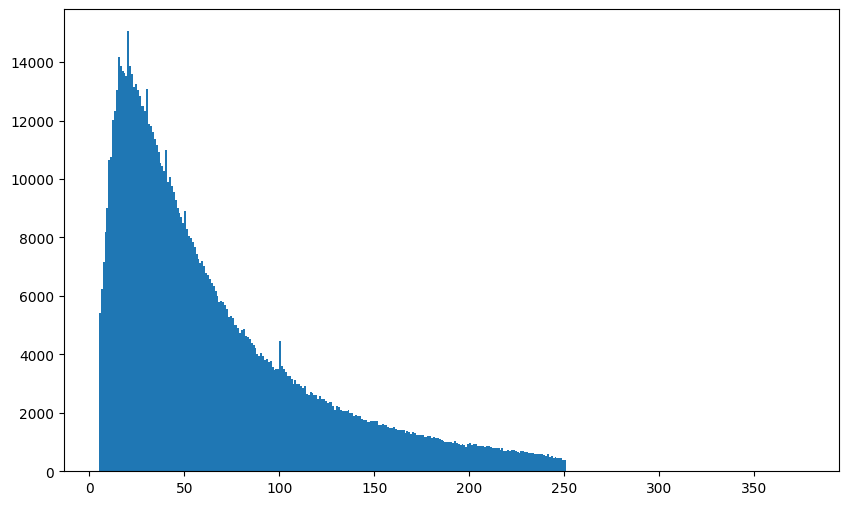

In [40]:
histogram(playlist_metadata["num_tracks"], 1)

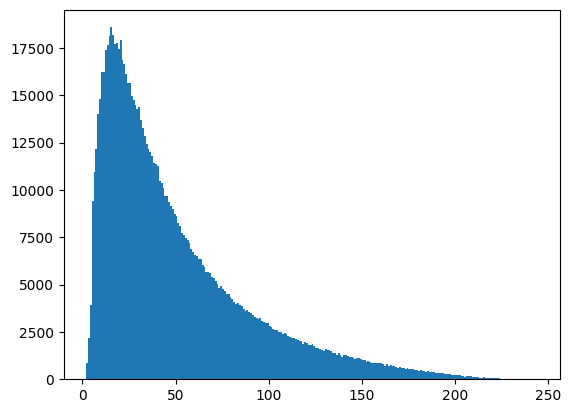

In [9]:
histogram(playlist_metadata["num_albums"], 1)

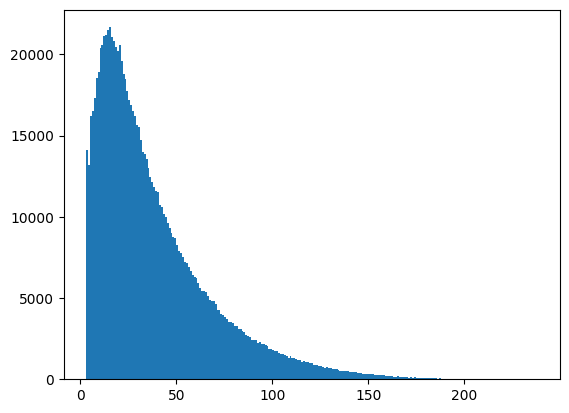

In [10]:
histogram(playlist_metadata["num_artists"], 1)

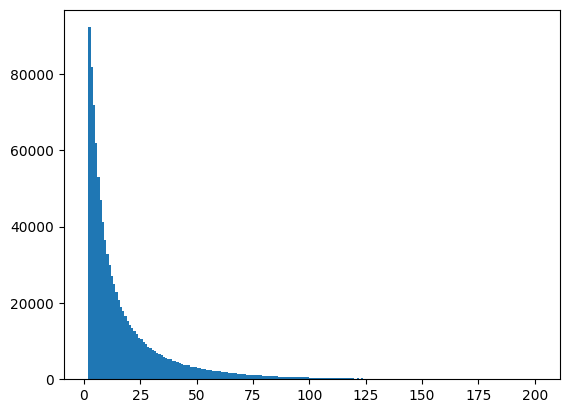

In [11]:
histogram(playlist_metadata["num_edits"], 1)

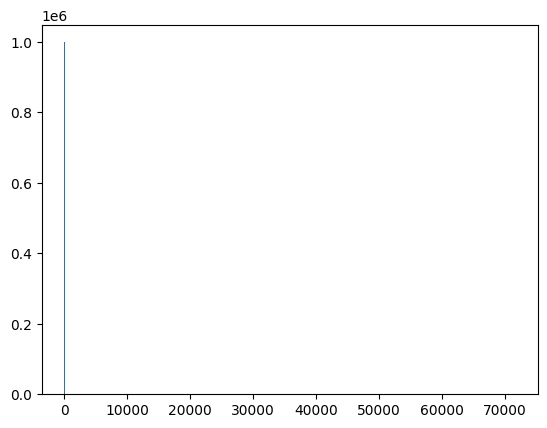

In [12]:
histogram(playlist_metadata["num_followers"], 50)

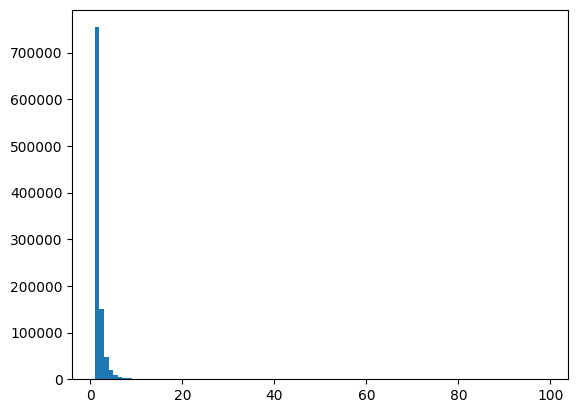

In [13]:
histogram(playlist_metadata[playlist_metadata["num_followers"] < 100]["num_followers"], 1)

In [14]:
playlist_metadata[["num_tracks", "num_albums", "num_artists", "num_edits", "num_followers"]].corr()

,num_tracks,num_albums,num_artists,num_edits,num_followers
num_tracks,1.000000,0.900415,0.818381,0.599767,0.004760
num_albums,0.900415,1.000000,0.956293,0.670720,0.003484
num_artists,0.818381,0.956293,1.000000,0.661896,0.004227
num_edits,0.599767,0.670720,0.661896,1.000000,0.003299
num_followers,0.004760,0.003484,0.004227,0.003299,1.000000


In [15]:
playlist_contents.head()

,pid,track_uri,position
0,0,0UaMYEvWZi0ZqiDOoHU3YI,0
1,0,6I9VzXrHxO9rA9A5euc8Ak,1
2,0,0WqIKmW4BTrj3eJFmnCKMv,2
3,0,1AWQoqb9bSvzTjaLralEkT,3
4,0,1lzr43nnXAijIGYnCT8M8H,4


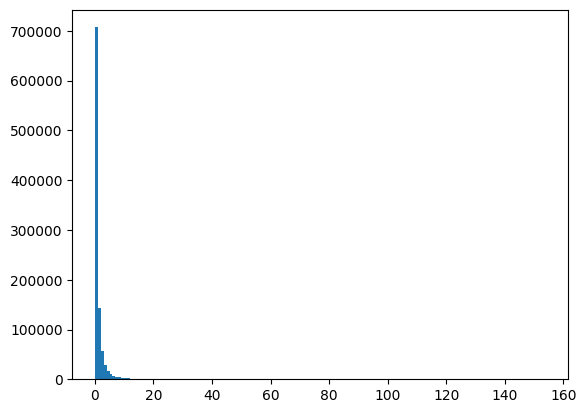

In [16]:
num_repeats = db.sql("""
    SELECT pid, COUNT(track_uri) - COUNT(DISTINCT track_uri) AS num_repeats
    FROM playlist_contents
    GROUP BY pid
    ORDER BY num_repeats
""").df()

histogram(num_repeats["num_repeats"], 1)

In [17]:
num_repeats[num_repeats["num_repeats"] > 0].shape[0]

292851

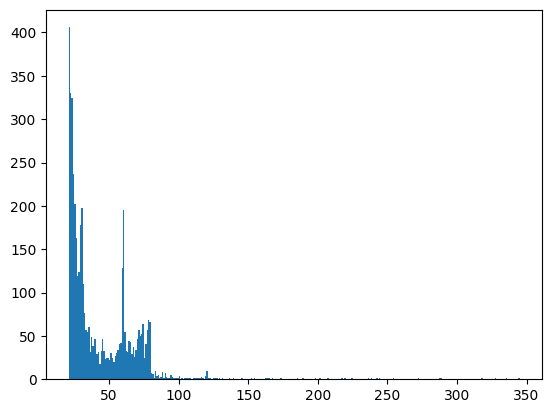

In [25]:
histogram(track_metadata[track_metadata["duration_ms"] // 60000 > 20]["duration_ms"] // 60000, 1)

In [24]:
track_metadata[track_metadata["duration_ms"] // 60000 == 60]

,track_uri,album_uri,artist_uri,track_name,album_name,artist_name,duration_ms
129000,2fTi3xHGVHdMqAYL1yCMNs,2MjlJIYeE6d5PcdBze8dk1,0e6qzpphJHtObTSwD75mi0,We Go Deep - Remix Edition - Continuous Mix,We Go Deep,The Avener,3609889
148502,0Grp18VKRYuwcHltn1sCTv,6CVbYyeOANeLD8UT7ItF8q,5yFCStZWJovRUQvUVBPQwu,Relaxing Beach Campfire,Relaxing Beach Campfire (4 Hours) for Relaxati...,Soul Soother,3616089
220091,3HYKfckpqFcWZbFkHfRQX4,7qW2MAgCAWQY1ak8ENr6ou,1ZtvNuHuQuTofYEtJEm5dD,Gentle Birds and Forest Stream for Relaxation ...,"Bird Sounds - Morning Birds for Relaxation, Me...",Sounds of Nature White Noise Sound Effects,3600000
220092,0t6CQX0cq56YScI0xpk2YG,1FYYVGM9crxpz4TV8jXUSr,1ZtvNuHuQuTofYEtJEm5dD,"Relaxing Thunder Sound, Thunderstorm, Rolling ...","Thunderstorm - A Sound of Thunder, Relaxing Th...",Sounds of Nature White Noise Sound Effects,3600000
220094,67qrFGg310aqPHSB9KMWly,0XmPmpFcIYX1iGDkE09T47,1ZtvNuHuQuTofYEtJEm5dD,"Tropical Ocean Waves, Sound Effects Download, ...",Waves - Tropical Ocean Waves - Relaxing Ocean ...,Sounds of Nature White Noise Sound Effects,3600020
...,...,...,...,...,...,...,...
2257966,2XN2BVoRnoJPWv7tOuGjyf,5GUyLyWd9JBinUJVgHao4h,6dwJxwQAGxM8kjGwjJMqkV,Low Beta 15 Hz (Concentration - Working),"Gravity Beats Cosmical Frequencies & Sounds, B...",Binaural Mind Serenity Delta Theta Gamma Waves,3600021
2258894,18j2VddwjfLAnc6RkvdDvK,1TJWMYWMSi8Frc3VnFvHeM,2zrMz4hqmghaJmsyloscon,Peace And Serenity (use The Healing Power Of N...,5 Hours of Calming & Soothing Ocean Wave Sound...,Song of the Ocean - Best Quality Nature Sounds,3602024
2258895,59QGV1Qsws6f7olFoUN8w4,6GNVFeHI1ZttVfukmMN7JF,7kykPszvwa2xa8VU3j3OkK,Schlafen und Träumen (Natürliches Weisses Raus...,5 Stunden beruhigendes Meeresrauschen - Natürl...,Gesang des Meeres - Die besten Naturklänge und...,3602024
2258896,1PLRwl7q2Nj5eRh1cDnjAK,1TJWMYWMSi8Frc3VnFvHeM,2zrMz4hqmghaJmsyloscon,"Seashore Relaxation (perfect For Spa, Yoga, Ma...",5 Hours of Calming & Soothing Ocean Wave Sound...,Song of the Ocean - Best Quality Nature Sounds,3602024


In [27]:
x = playlist_contents[playlist_contents["track_uri"] == "0Grp18VKRYuwcHltn1sCTv"]["pid"].values

In [29]:
playlist_metadata[playlist_metadata["pid"].isin(x)]

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks
8033,105033,Sleep Time,1489622400,4,1,6,7,7
25166,120166,relax,1489536000,2,1,17,17,17
58741,150741,Chill,1481155200,8,1,24,27,28
145549,229549,sleep,1502150400,4,1,12,12,14
207729,285729,NATURE SOUNDS,1435881600,2,1,15,24,31
238130,312130,Healing,1500076800,7,1,17,23,64
238442,312442,SLEEP,1469491200,3,1,23,26,45
271134,342134,💤💤,1456704000,3,1,9,14,19
312342,38342,sleep,1441584000,2,1,12,16,20
440657,495657,Sleep Music,1508630400,17,1,107,125,173


In [31]:
playlist_contents[playlist_contents["pid"] == 659834].merge(track_metadata, on="track_uri")

,pid,track_uri,position,album_uri,artist_uri,track_name,album_name,artist_name,duration_ms
0,659834,4sj6Hk441YK66GxLM6M5Iz,0,6amGCB0oKRjnzmbyjapMst,6XjXff8FNS5CqpF8dVAtoo,"If You Think This Song Is About You, It Probab...",D.R.U.G.S.,Destroy Rebuild Until God Shows,150093
1,659834,42GP0xKtkolBnmqQRvSllO,1,4nYsnQpTAQaPzrPc6rOsBN,3utxjLheHaVEd9bPjQRsy8,Welcome Home,Good Apollo I'm Burning Star IV Volume One: Fr...,Coheed and Cambria,374973
2,659834,1biLmduUzRgTYgAeim76q4,2,1xcnuKID1RuI0HhF4h1RSL,5ULEQTVn8PITZVC5PwguDN,Black Maria,Short While Ago,Three Tall Pines,282453
3,659834,2EH1ZVZx2wPGtQb5V2hNih,3,3Apdb6qGTuQe6ac3yqgl9A,4ZWvN9FEfdTea1SEHjpTNi,Good To Sea,Autumn of the Seraphs,Pinback,191933
4,659834,4rc2WNOt2w8BHfQjBC8PO0,4,75Z98z7kl42oWcT0UvtO6e,6guC9FqvlVboSKTI77NG2k,We Own The Night,Instant Gratification,Dance Gavin Dance,205706
...,...,...,...,...,...,...,...,...,...
96,659834,1Hin2DTHCqkG0BRpcbu4tY,96,4KVrN1mStUcHU6ciBL7dHj,1EVWYRr2obCRDoSoD6KSuM,We Run The Night,Flashing Lights,Havana Brown,228188
97,659834,4BkcZC0YMKK3DZbPacifse,97,6bMAkrWl1DJAedPMlzhoqM,4YPVXVT6ryJHGx5lGa56Pk,Sharks,Letters,Eclipses for Eyes,192000
98,659834,3uGk1gDFXQSXPwxVjtcNWu,98,6RqEMiXSrJ2CktsDvztFiA,5RZS0SXUPOybDrsKJUBAP7,Country Crickets Sleep Aid Loop,Country Crickets Sleep Aid Loop - Single,HB,608000
99,659834,3szv5sxIp3u34aQLq3415I,99,4WWw8pQHsxnWaWwpLvwZTS,4tGd3HHlV4RVOdlBc5LAW3,Kuroi Ledge,No Place,A Lot Like Birds,357200


In [51]:
artist_data = db.sql("""
    SELECT artist_uri, FIRST(artist_name) AS artist_name, COUNT(DISTINCT album_uri) AS num_albums, COUNT(DISTINCT track_uri) AS num_tracks
    FROM track_metadata
    GROUP BY artist_uri
""").df()

In [52]:
artist_data.sort_values(by="num_albums")

,artist_uri,artist_name,num_albums,num_tracks
295859,7kNzuJlU1OBa3ot6fapZKc,Shelton,1,1
213622,7E7gTtDSNoSoROtCodqQSn,Gekkan Probowler,1,1
278148,5VkzmJFZbFfFB7vrKZif64,Haderslev Drengekor,1,1
213619,1CmpY3kJAso0X94vvyqGLe,Kelli Schaefer,1,3
213617,2oW5JO2C51iJSF7i6yNU4k,Ken Kolodner,1,1
...,...,...,...,...
69214,3MKCzCnpzw3TjUYs2v7vDA,Pyotr Ilyich Tchaikovsky,799,2609
4712,0LyfQWJT6nXafLPZqxe9Of,Various Artists,1110,2447
4754,2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,1303,4312
129292,5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1365,5417


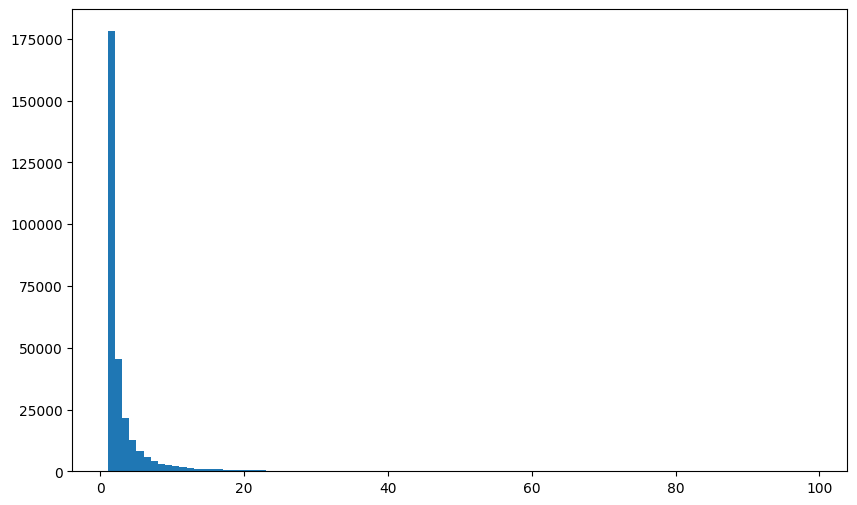

In [45]:
histogram(artist_data[artist_data["num_albums"] < 100]["num_albums"], 1)

In [57]:
album_data = db.sql("""
    SELECT album_uri, FIRST(album_name) AS album_name, FIRST(artist_name) AS artist_name,  COUNT(DISTINCT track_uri) AS num_tracks
    FROM track_metadata
    GROUP BY album_uri
""").df()

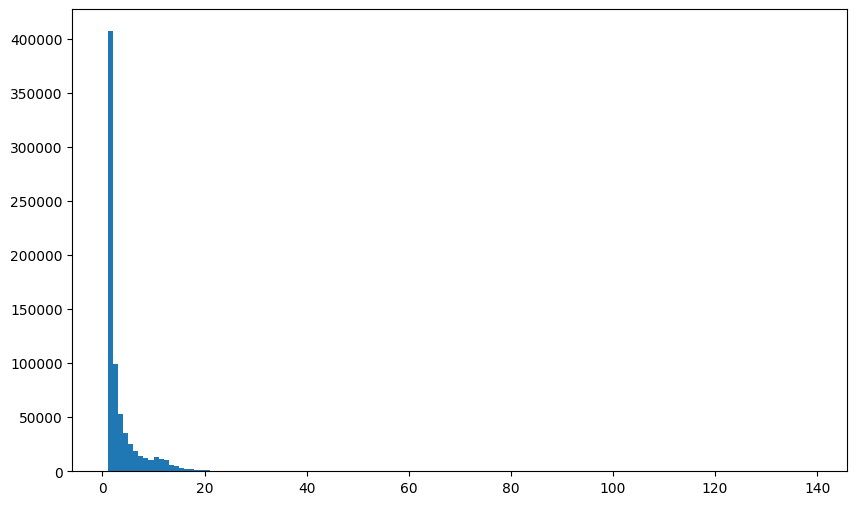

In [58]:
histogram(album_data["num_tracks"], 1)

In [59]:
album_data.sort_values(by="num_tracks")

,album_uri,album_name,artist_name,num_tracks
0,5hExLjL61s2EfWpC2oqMhb,A Salute To Train,Drops Of Jupiter,1
290332,0OsqdLxQpBWI2Fw6Ztxc0D,20th Century Masters: The Millennium Collectio...,Four Tops,1
546281,3ZRpmo4encM3hourEMUE0g,Masterpiece,The Temptations,1
290330,6SqGaJ86YLoqLKIRe7YAwD,See the Light // All Through the Night,Wolf & Cub,1
546282,6HWNOG6wtNPzOKnYDouwt9,New Day,Xavier Eleven,1
...,...,...,...,...
690573,5dw8l7eXBnmGYUIw9riuwT,123 Favorite Kids Songs,Baby Genius,122
126215,6tQ1p5gjEujiZGAK10pY1f,The Complete Hank Williams,Hank Williams,129
332221,6WlzaRoDShdgVgaqJRjyNH,"Glee: The Music, The Complete Season Two",Glee Cast,131
585535,52nZGRpZ9wuAsaDCwfadr5,Big Vivaldi Box,Rudolf Klepac,135


In [69]:
playlist_metadata["track_sparsity"] = playlist_metadata["num_tracks"] / track_metadata["track_uri"].nunique()
playlist_metadata["album_sparsity"] = playlist_metadata["num_albums"] / track_metadata["album_uri"].nunique()
playlist_metadata["artist_sparsity"] = playlist_metadata["num_artists"] / track_metadata["artist_uri"].nunique()
playlist_metadata

,pid,name,last_modified,num_edits,num_followers,num_artists,num_albums,num_tracks,track_sparsity,album_sparsity,artist_sparsity
0,0,Throwbacks,1493424000,6,1,37,47,52,0.000023,0.000064,0.000125
1,1,Awesome Playlist,1506556800,5,1,21,23,39,0.000017,0.000031,0.000071
2,2,korean,1505692800,18,1,31,51,64,0.000028,0.000069,0.000105
3,3,mat,1501027200,4,1,86,107,126,0.000056,0.000146,0.000291
4,4,90s,1401667200,7,2,16,16,17,0.000008,0.000022,0.000054
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,Praise,1409529600,5,1,11,23,32,0.000014,0.000031,0.000037
999996,999996,Worship,1475625600,12,1,42,74,122,0.000054,0.000101,0.000142
999997,999997,Sex,1498176000,4,1,17,22,24,0.000011,0.000030,0.000057
999998,999998,✝️,1506816000,6,1,5,8,11,0.000005,0.000011,0.000017


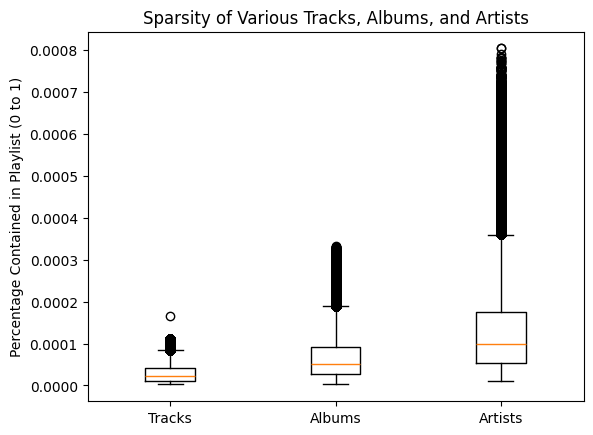

In [81]:
plt.boxplot([playlist_metadata["track_sparsity"], playlist_metadata["album_sparsity"], playlist_metadata["artist_sparsity"]], tick_labels=['Tracks', 'Albums', 'Artists'])
plt.ylabel("Percentage Contained in Playlist (0 to 1)")
plt.title("Sparsity of Various Tracks, Albums, and Artists")
plt.show()

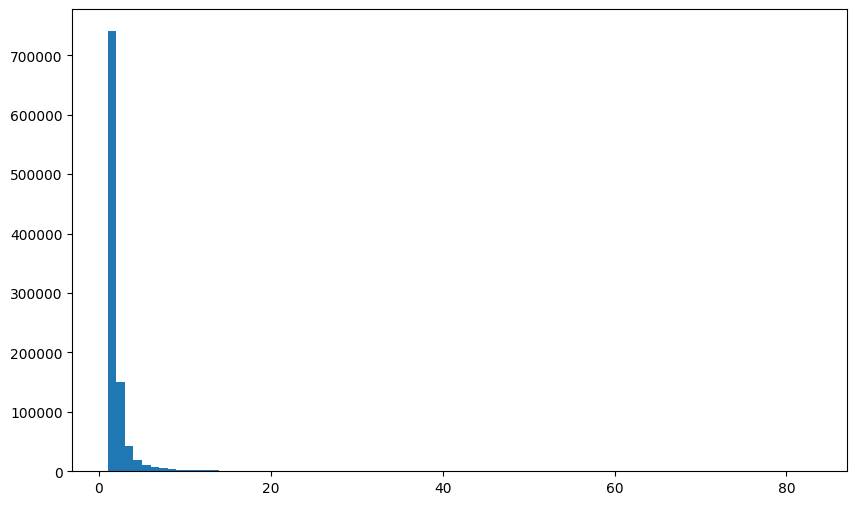

In [89]:
histogram(playlist_metadata["num_tracks"] / playlist_metadata["num_artists"], 1)

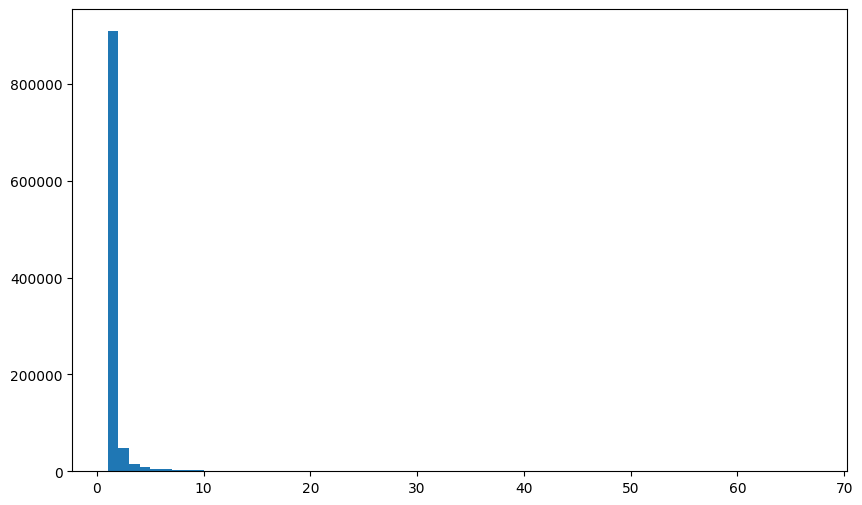

In [90]:
histogram(playlist_metadata["num_tracks"] / playlist_metadata["num_albums"], 1)

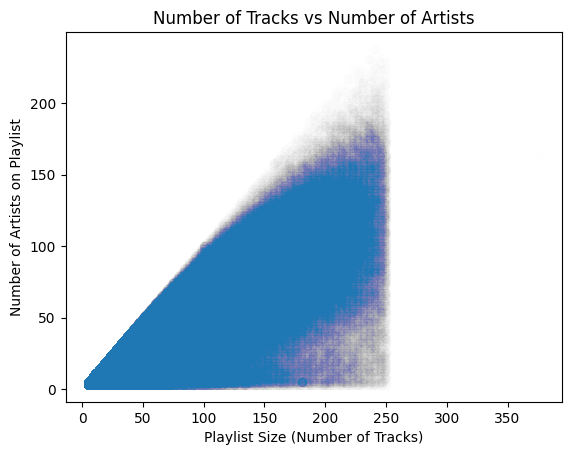

In [103]:
plt.scatter(x=playlist_metadata["num_tracks"], y=playlist_metadata["num_artists"], alpha=0.002)
plt.xlabel("Playlist Size (Number of Tracks)")
plt.ylabel("Number of Artists on Playlist")
plt.title("Number of Tracks vs Number of Artists")
plt.show()